In [10]:
import os
import glob

import numpy as np

from PIL import Image, ImageChops
import cv2
import IPython

import albumentations as A

DATA_DIR = "/home/ec2-user/word_level_ocr/pritom/datasets/"

Total Validation images: 100000

ফুঁসছে,


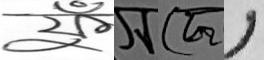

দলটাই


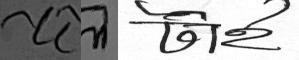

দশবারও


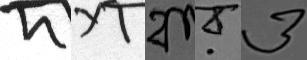

ইখলাসকে


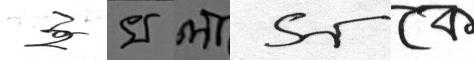

অন্তর্দৃষ্টিসম্পন্ন


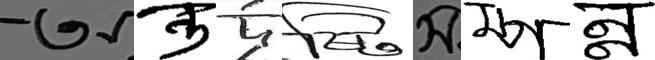

In [8]:
val_image_files = glob.glob(os.path.join(DATA_DIR, "synword_valid_set/*"))
print("Total Validation images: " + str(len(val_image_files)))
print()

for i in val_image_files[:5]:
    print(i.split('/')[-1].split('.')[-2].split('_')[-1])
    display(IPython.display.Image(filename=i))

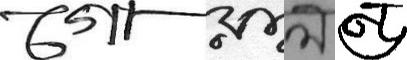

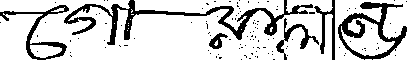

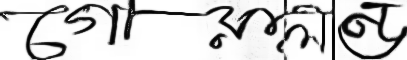

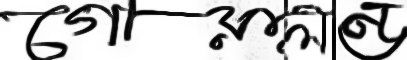

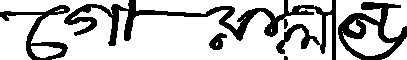

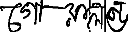

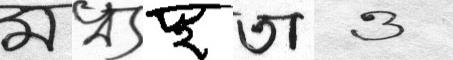

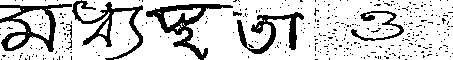

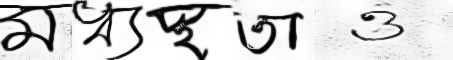

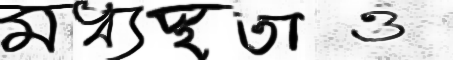

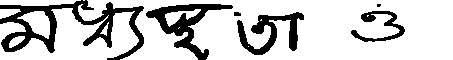

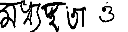

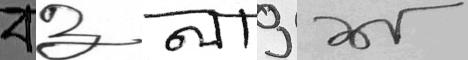

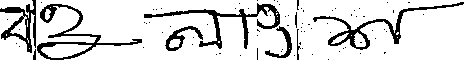

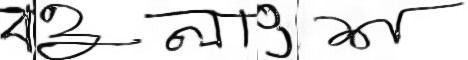

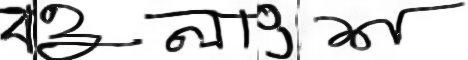

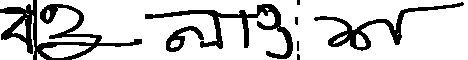

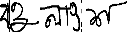

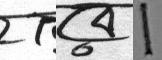

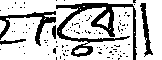

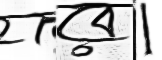

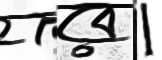

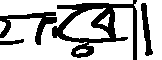

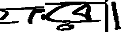

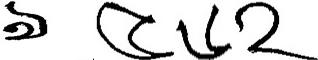

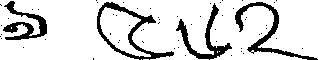

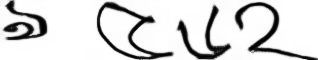

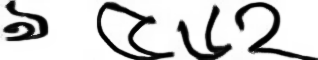

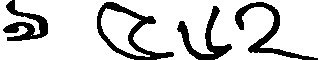

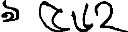

In [12]:
data_transform = A.Compose([
        #A.augmentations.transforms.GaussNoise(var_limit=(120.0, 135.0), mean=0, always_apply=False,p=0.3),
        A.augmentations.transforms.GaussNoise(var_limit=(120.0, 135.0), mean=0, always_apply=False,p=0.5),
        #A.augmentations.transforms.MotionBlur(p=0.3),
        
        ######################Find good values for these#######################
        #A.imgaug.transforms.IAAPerspective (scale=(0.05, 0.1), keep_size=True, always_apply=False, p=0.5),
        #A.augmentations.transforms.ElasticTransform(),
        #A.imgaug.transforms.IAAPerspective (scale=(0.05, 0.1), keep_size=True, always_apply=False, p=0.5),

        ###########Interesting stuff##############
        #A.augmentations.transforms.MultiplicativeNoise (multiplier=(0.9, 1.1) ) ,
        #A.imgaug.transforms.IAAAffine (scale=1.0, translate_percent=None, translate_px=None, rotate=5.0, shear=5.0, order=1, cval=0, mode='reflect', always_apply=False, p=0.5),
        #A.imgaug.transforms.IAAEmboss(alpha=(0.2, 0.5), strength=(0.2, 0.7), always_apply=False, p=0.5),

        A.imgaug.transforms.IAAAdditiveGaussianNoise(loc=1, scale=(2.5500000000000003, 12.75), per_channel=False, always_apply=False, p=0.5),
        A.augmentations.transforms.MotionBlur(p=0.5),
        #A.Normalize(mean=(0.588), std=(0.193)),
        # ToTensorV2(),
    ])

for i in val_image_files[2000:2005]:
    inp_h = 32
    inp_w = 128

    img = cv2.imread(filename=i)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    display(Image.fromarray(img))

    img_h, img_w = img.shape
    img = cv2.adaptiveThreshold(img,255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 7)
    display(Image.fromarray(img))
    
    img = cv2.fastNlMeansDenoising(img, None, 70, 7, 21);
    display(Image.fromarray(img))

    kernel = np.ones((2,2), np.uint8)
    img = cv2.erode(img, kernel, iterations = 1)
    display(Image.fromarray(img))

#     img = cv2.GaussianBlur(img,(5,5),0)
    _, img = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
    display(Image.fromarray(img))

#     img = cv2.equalizeHist(img)
#     display(Image.fromarray(img))

#     clahe=cv2.createCLAHE(clipLimit=40)
#     img=clahe.apply(img)
#     display(Image.fromarray(img))

    img = cv2.resize(img, (0,0), fx=inp_w / img_w, fy=inp_h / img_h, interpolation=cv2.INTER_CUBIC)
    display(Image.fromarray(img))

#     img = np.reshape(img, (inp_h, inp_w, 1))
#     print(img)

    #######################################################
    #normalize moved to albumentations
    #img = img.astype(np.float32)
    #img = (img/255. - self.mean) / self.std

#     #putting channels first
#     image = img.transpose([2, 0, 1])
#     #print(image.shape)

#     if self.transform is not None:
#         img = self.transform(image = image)["image"]#["image"]

#     _, img = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

In [ ]:
#visualizing augmentations
def visualize_augmentations(dataset, idx=0, samples=10, cols=5):
    dataset = copy.deepcopy(dataset)
    dataset.transform = A.Compose([t for t in dataset.transform if not isinstance(t, (A.Normalize, ToTensorV2) ) ])
    rows = samples // cols
    figure, ax = plt.subplots(nrows=rows, ncols=cols, figsize=(12,6))
    for i in range(samples):
        #print(len(dataset[idx]))
        #print(dataset[idx])
        
        #Dictionary has 3 values,(image, filename, idx)
        image, _, _= dataset[idx]
        #image, _= dataset[idx]
        
        #print(type(image))
        
        #this section was added,major change from original albumentation...Based on dataloaders
        # for key, value in image.items():
        #     print(key)
        #     print(value)
        #     value = value.transpose([1, 2, 0])
        #     #value = value.transpose([1, 2, 0])
        #     #plt.imsave( '/home/imr555/Desktop/Apurba_Job/Day_18/wlborcv3(noisetrain)/1.png', value  )
        #     print(type(value))
        #     print(value.shape)
        #     #break
        #     value = np.squeeze(value, axis=(2,) )
        #     print(value.shape)
        
        #ax.ravel()[i].imshow(value)
        

        ######################Directconversion(If no dictionary)####################
        image = np.squeeze(image, axis=(0,) )
        ax.ravel()[i].imshow(image, cmap='gray')

        ax.ravel()[i].set_axis_off()
    plt.tight_layout()
    plt.show()
